# Problem Statement

## Context:

The thera bank recently saw a steep decline in the number of users of their credit card. credit cards are good source of income for banks because of different kinds of fees charged by the banks like Annual fees, balance transfer fees and cash advance fees, late payment fees foreign transaction fees and other some fees are charged to every user irrespective of usage while others are charged under specific circumstances.

## Objective:

Customers leaving credit card services would lead the bank to loss. so the bank wants to analyse the data of customers and identify the customers who will leave their credit card services and the reason for the same. so that the bank could improve upon those areas.

You as a data scientist at the bank need to explore the data provided identify patterns and come up with classification model to identify customers likely to churn and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce they credit cards

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [2]:
# Loading the dataset
data = pd.read_csv("BankChurners.csv")

## Overview of the dataset

In [3]:
df = data.copy()

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


## Finding the shape of the dataset

In [5]:
df.shape

(10127, 21)

There are 10127 rows and 21 columns in the given dataset.

## Check the data types of the columns in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 21 columns and 10127 observations in the dataset.


## Checking duplicates

In [7]:
df.duplicated().sum()

0

* There are no duplicate values in the dataset

## Checking missing values

In [8]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


## Treating the missing values

In [9]:
# Fill the missing values with 'Unknown'
df['Education_Level'].fillna('Unknown', inplace=True)
df['Marital_Status'].fillna('Unknown', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Statistical summary of the dataset

In [11]:
# let's view the statistical summary of the numerical columns in the data
df.describe(include="all")

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127,10127.000,10127,10127.000,10127,10127,10127,10127,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,739177606.334,NaN,46.326,NaN,2.346,NaN,NaN,NaN,NaN,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,NaN,8.017,NaN,1.299,NaN,NaN,NaN,NaN,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,NaN,26.000,NaN,0.000,NaN,NaN,NaN,NaN,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,NaN,41.000,NaN,1.000,NaN,NaN,NaN,NaN,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,NaN,46.000,NaN,2.000,NaN,NaN,NaN,NaN,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,NaN,52.000,NaN,3.000,NaN,NaN,NaN,NaN,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503


* Customer age is Ranges from 26 to 73 with an average of 46.323.
* Months_on_book of Customers have been with the bank for 13 to 56 months, averaging 35.93 months.
* Credit_Limit Ranges from $1,438 to $34,516, with an average of $8,632.
* Total_Trans_Amt (Transaction Amount) Varies from $510 to $18,484, with an  average  of  $4,404.
* Total_Trans_Ct (Transaction Count): Ranges from 10 to 139, with a mean of 64.86.
* Most customers are Graduates.
* Majority are Married.
* Most customers fall into Less than $40K income.

## Data Pre-Processing

In [12]:
df["CLIENTNUM"].nunique()

10127

* Since all the values in the CLIENTNUM column are unique we can drop it.

In [ ]:
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Making a list of all catrgorical variables
cat_col = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
----------------------------------------
Gender
F    5358
M    4769
Name: count, dtype: int64
----------------------------------------
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
----------------------------------------
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
----------------------------------------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
----------------------------------------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
----------------------------------------


* 1627 customers have closed their account.
* 3561 customers earn less than $40K.
* The vast majority of customers use Blue cards.* Most of the customers are married.

# Exploratory data analysis

# Univariate analysis

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Observations on each categorical variable

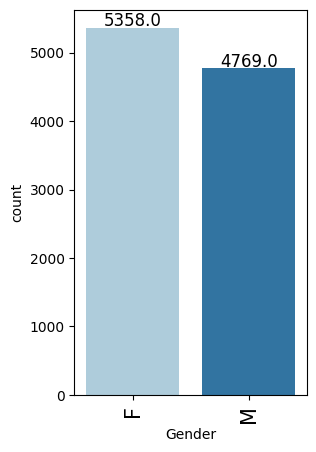

In [14]:
labeled_barplot(df, "Gender")

* There are more Female customers(5368) than mail customers(4769).


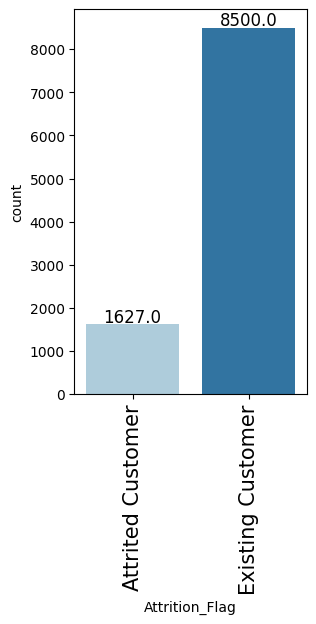

In [15]:
labeled_barplot(df, "Attrition_Flag")

* Majority of customers are Existing Customers (8,500), while 1627 customers have churned.

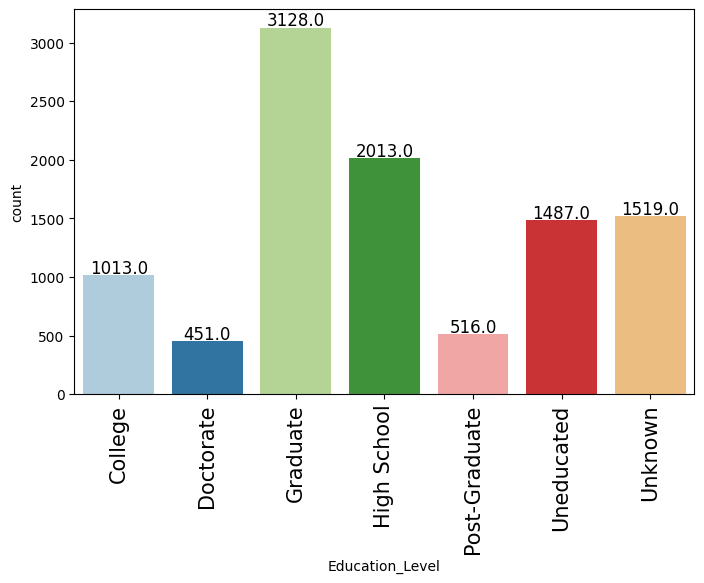

In [16]:
labeled_barplot(df, "Education_Level")

* Graduate and High school are most common education levels.

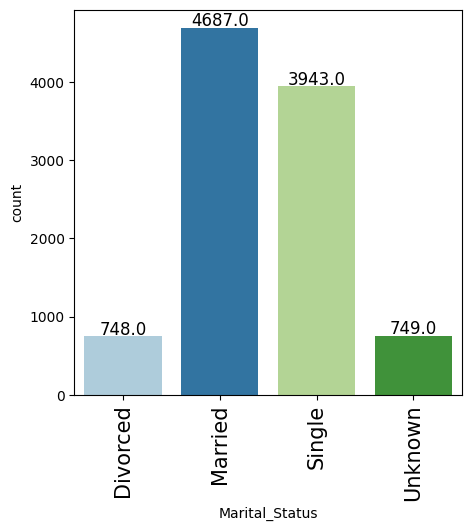

In [17]:
labeled_barplot(df, "Marital_Status")

* Majority of the customers are married.


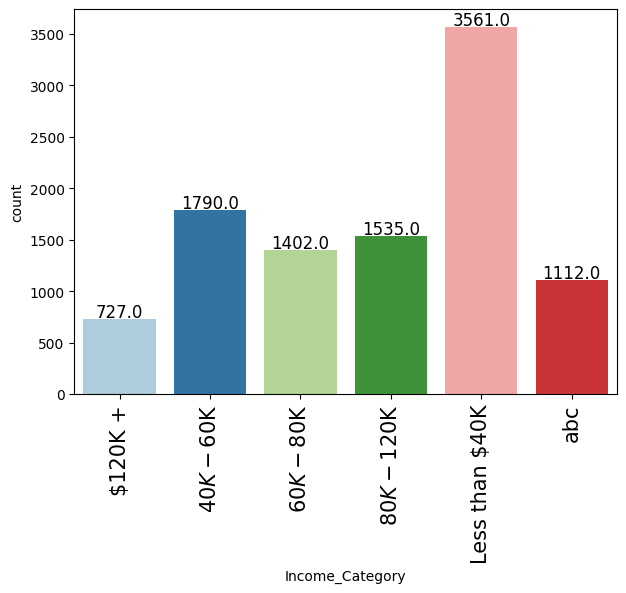

In [18]:
labeled_barplot(df, "Income_Category")

* Most customers(3561) earn less than $40k.


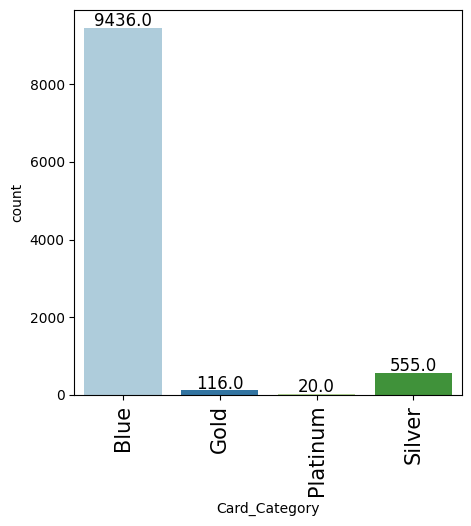

In [19]:
labeled_barplot(df, "Card_Category")

* Blue card dominates the other cards.

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# Set style for plots
sns.set_style("whitegrid")

# Separating categorical and numerical columns
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit',
                  'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                  'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']



* Majority of customers are Existing Customers (8,500), while 1627 customers have churned.
* The dataset is imbalanced,churned customers are significantly fewer than non-churned ones.
* There are more Female customers than mail customers.
* Graduate and High school are most common education levels.
* Majority of the customers are married.
* Most customers earn less than $40k.
* Blue card dominates the other cards.

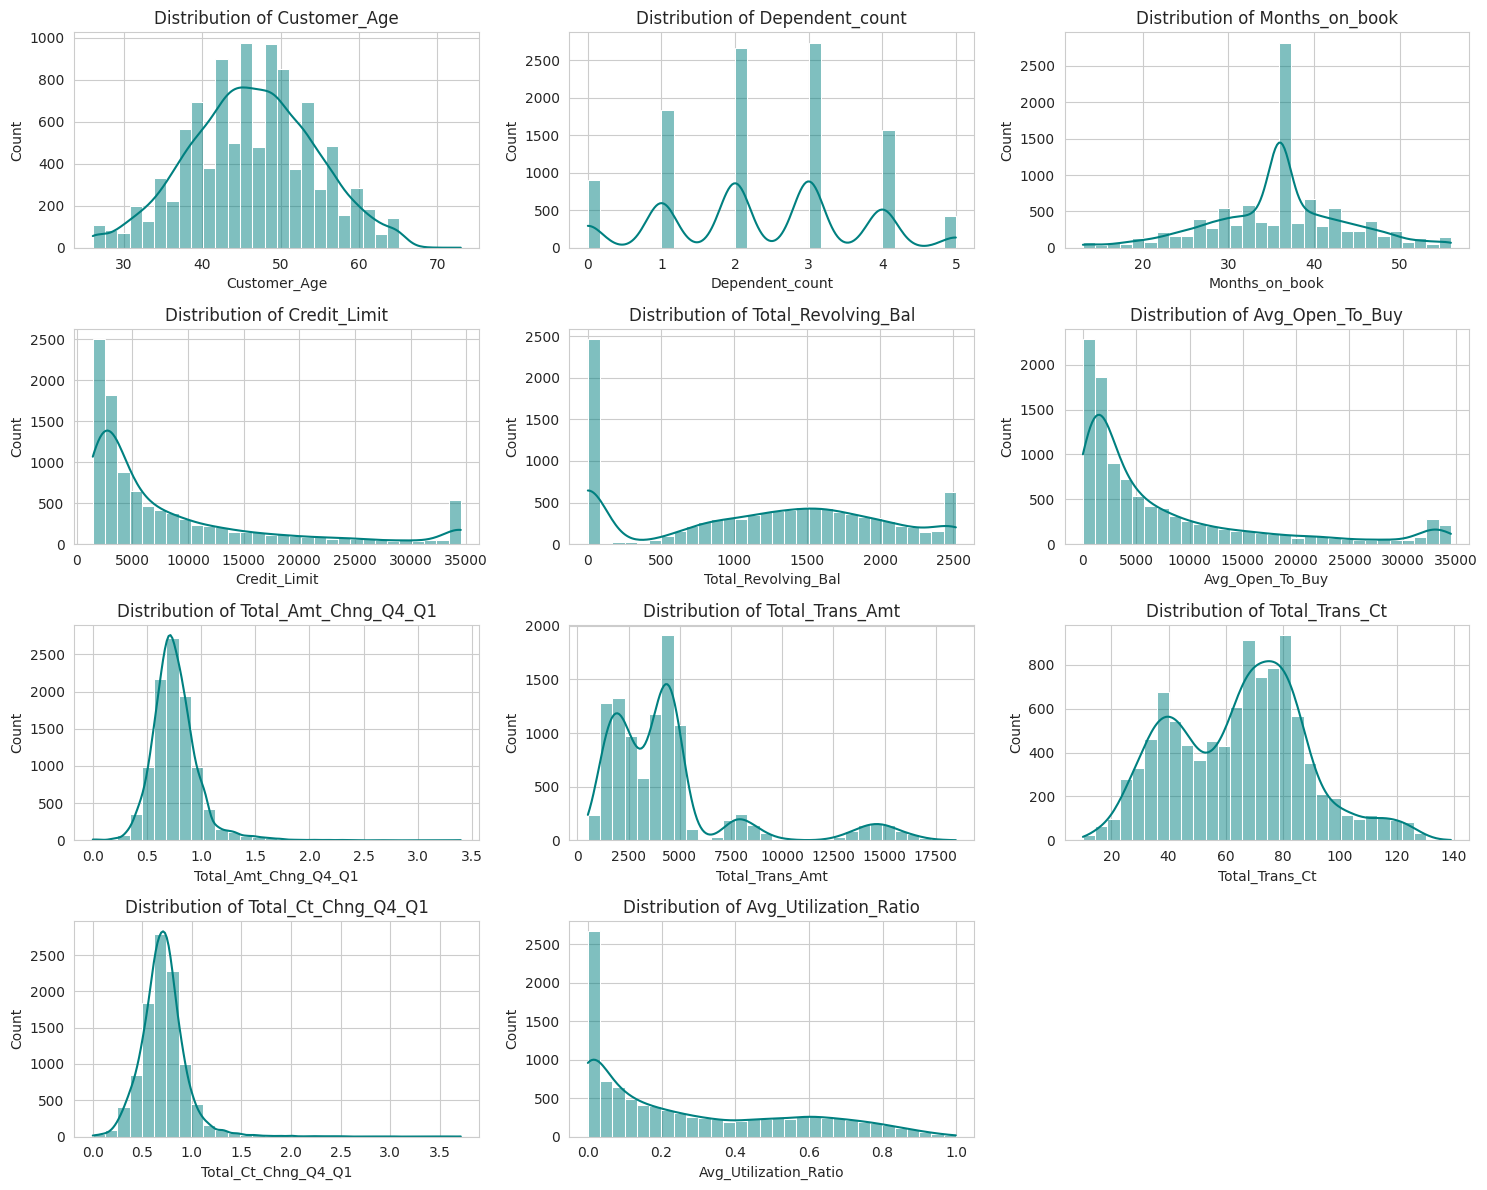

In [22]:
# Univariate Analysis for Numerical Variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

* customer age is normally distributed between 26 to 73 years.
* most of the customers have 1 to 3 dependents.
* most of the customers have been with the bank for 30 to 40 months.
* credit limit varies widely from $1438  to $34516.
* Total_Trans_Amt & Total_Trans_ct are highly skewed.
* Avg_Utilization_Ratio is right skewed.

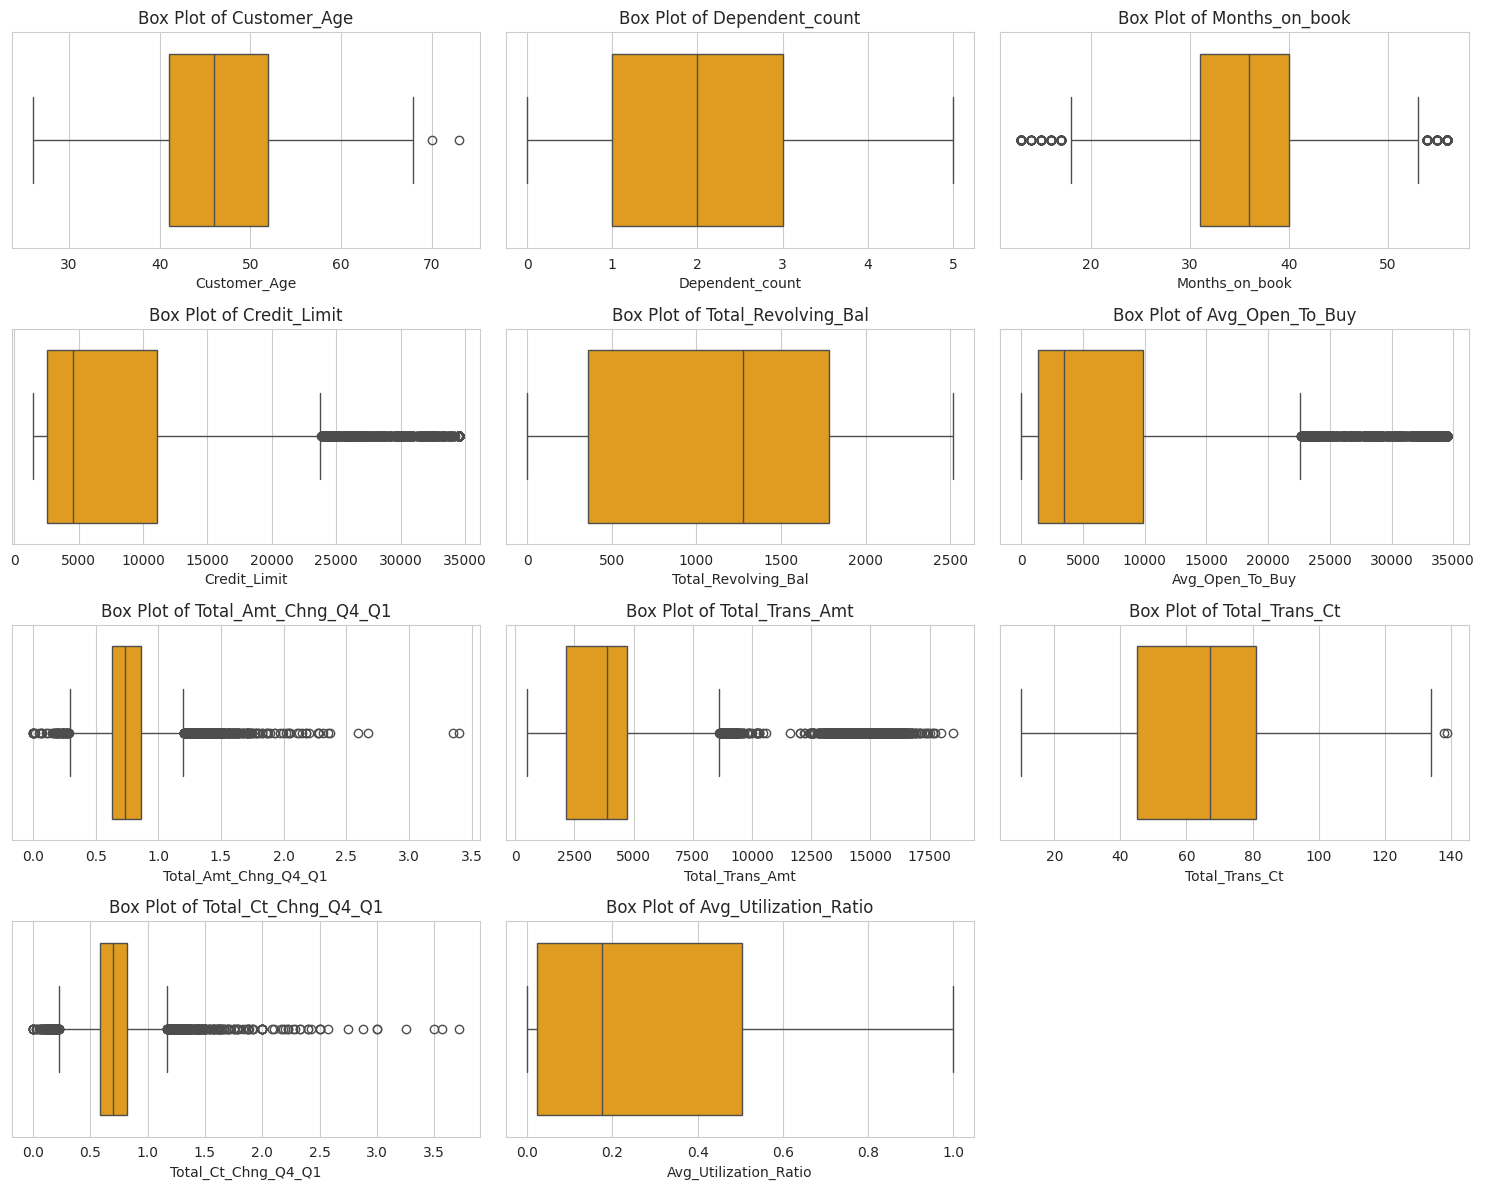

In [23]:
# Box plots for detecting outliers in numerical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

* Credit_Limit, Total_Trans_Amt, and Avg_Utilization_Ratio have significant outliers.

# Bivariate analysis

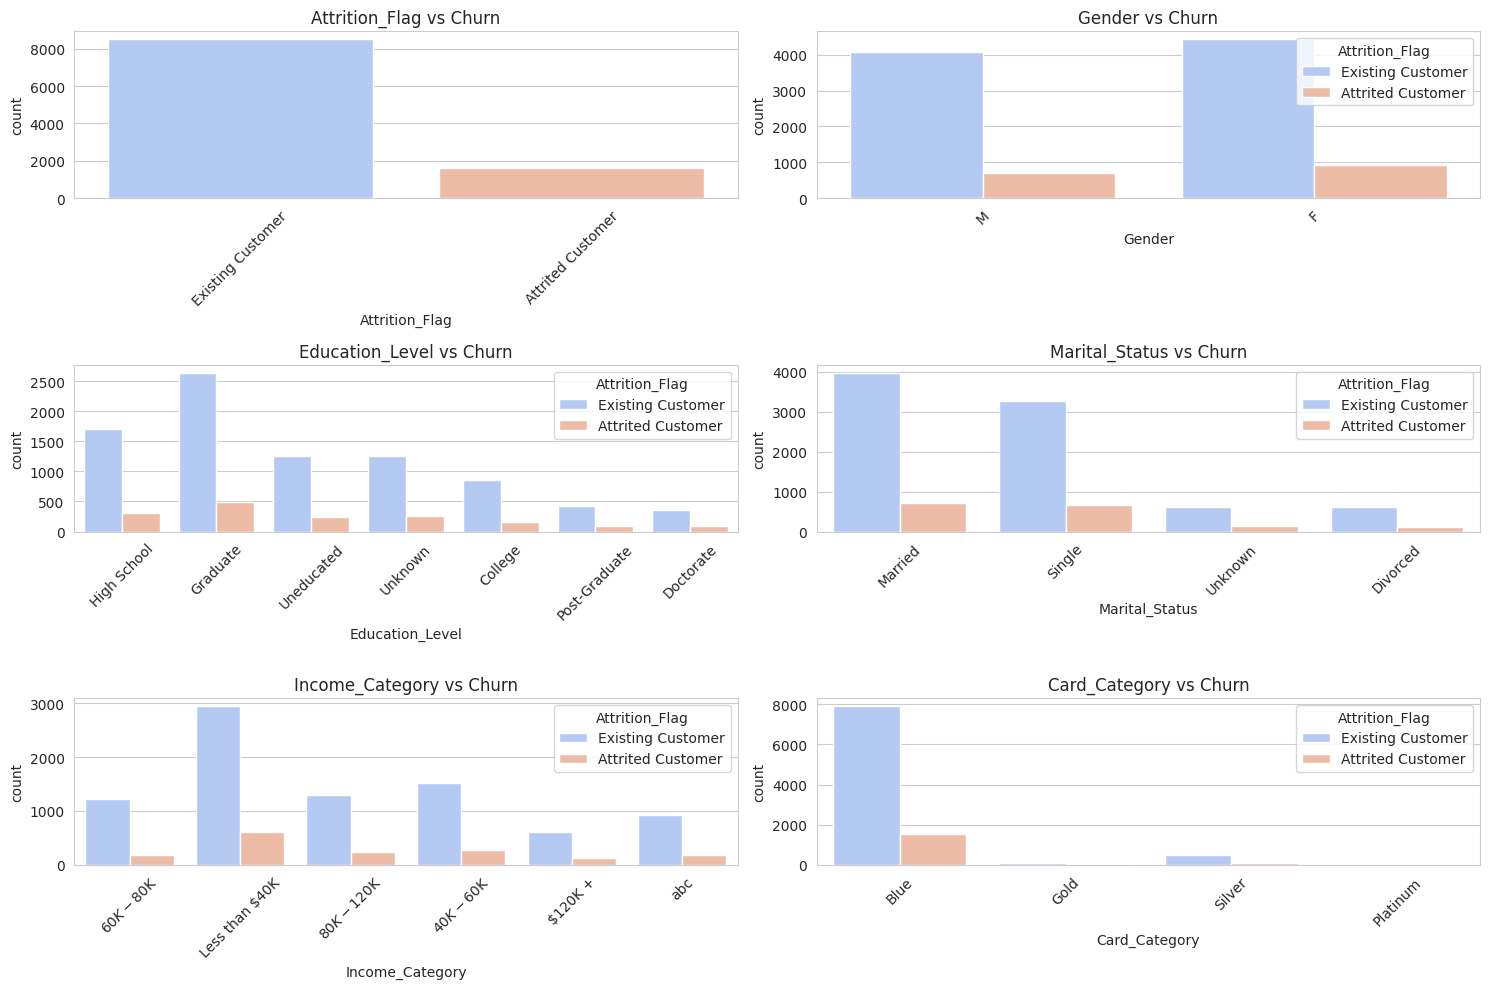

In [24]:
# Bivariate Analysis for Categorical Variables vs Churn
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], hue=df['Attrition_Flag'], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

* Both males and Females have similar churn pattern.
* Graduates and Highschool customers have lower churn rate.
* single customers churn more compared to married and others.
* customers earning lessthan $40k have the highest churn rate.
* Blue card users have the highest churn rate.

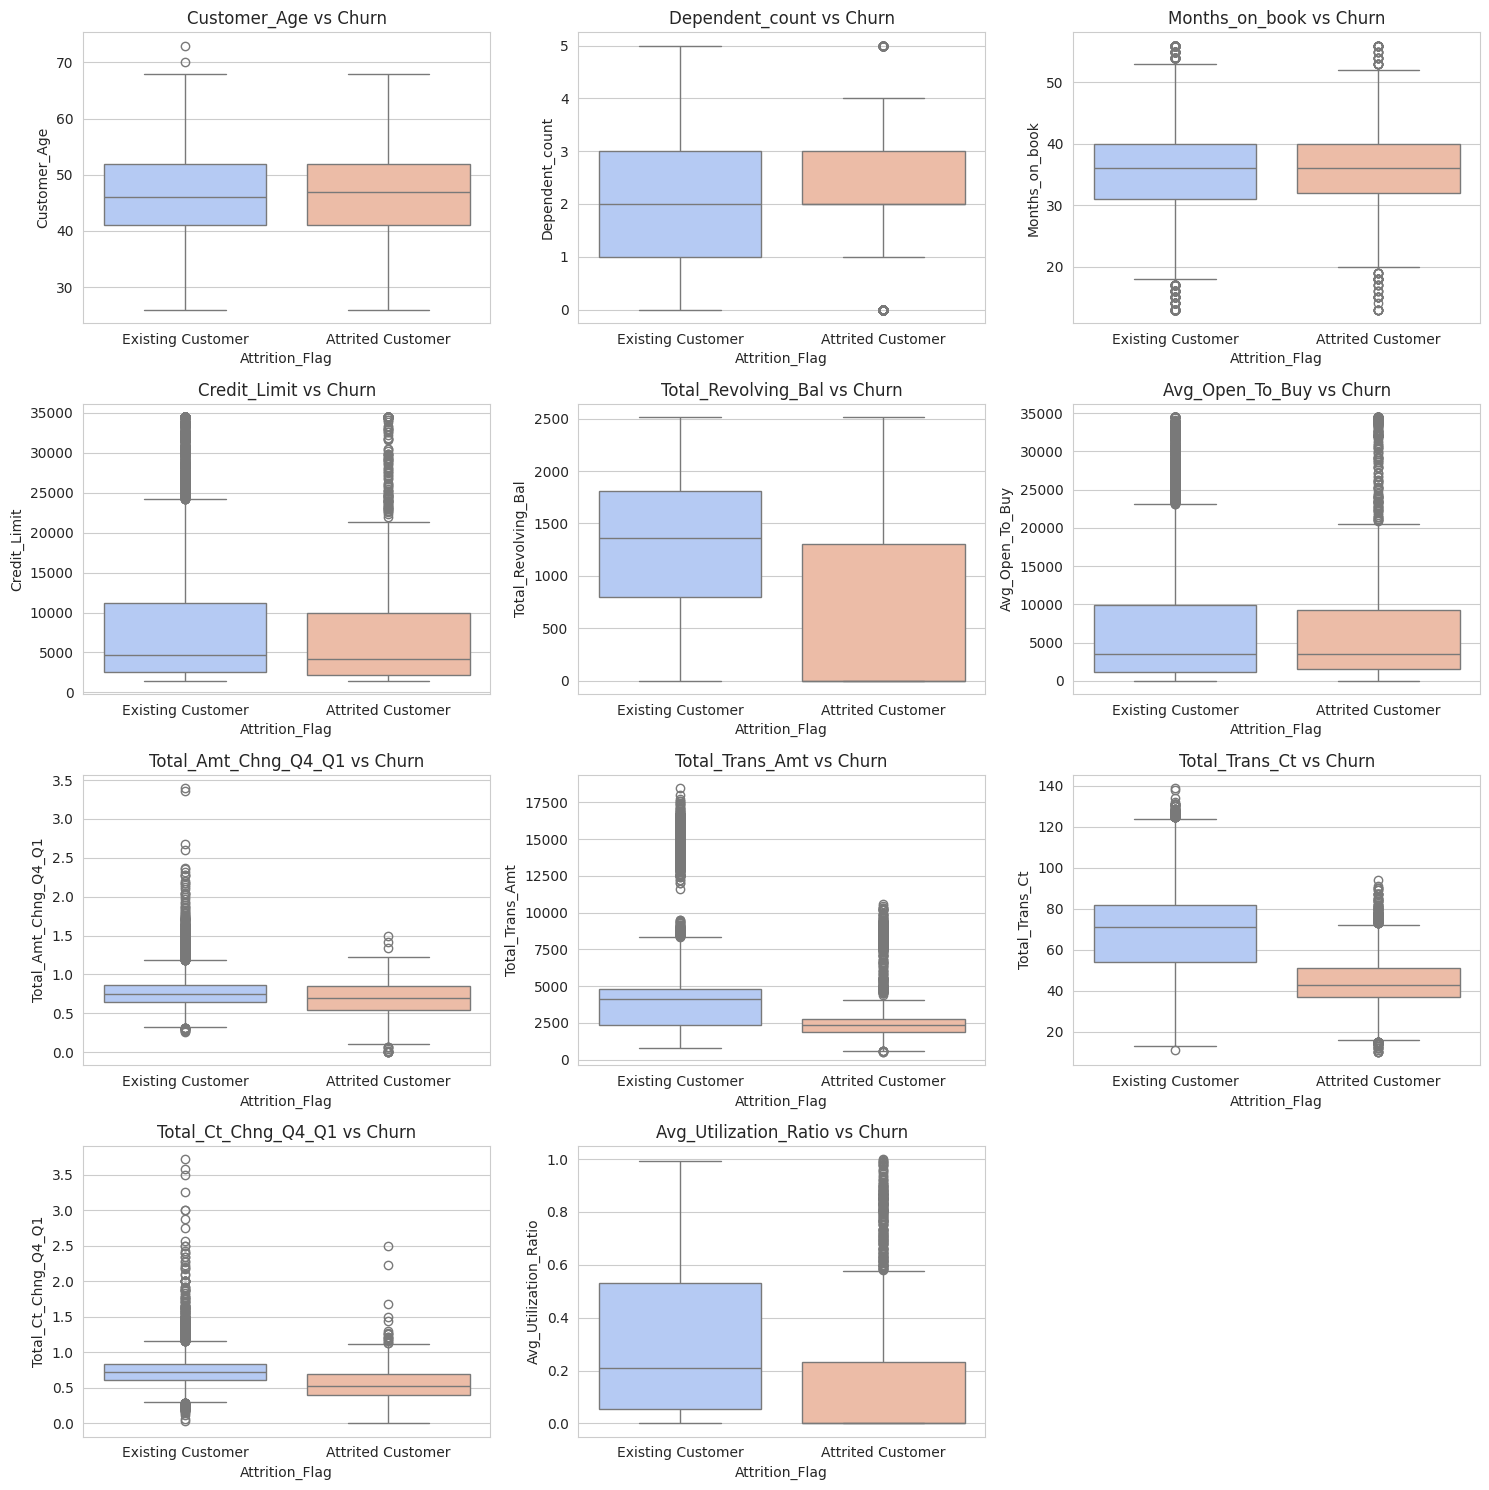

In [25]:
# Bivariate Analysis for Numerical Variables vs Churn
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df['Attrition_Flag'], y=df[col], palette="coolwarm")
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

* Young customers churn more compared to older ones.
* Customers woth zero dependent churn more.
* Lower credit limit customer churn more.
* Customers with lower transaction amounts churn more.
* customers who make fewer transactions churn more.
* Higher utilization ratio customers churn more.

In [ ]:
sns.pairplot(df, hue="Attrition_Flag")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


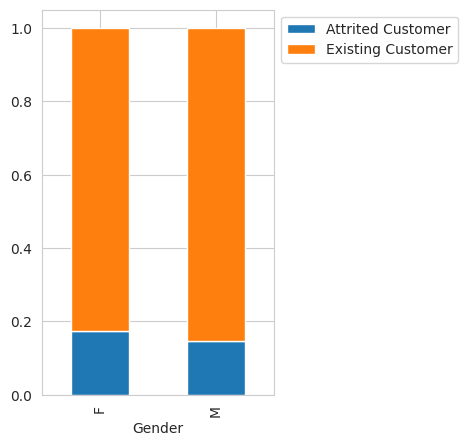

In [ ]:
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


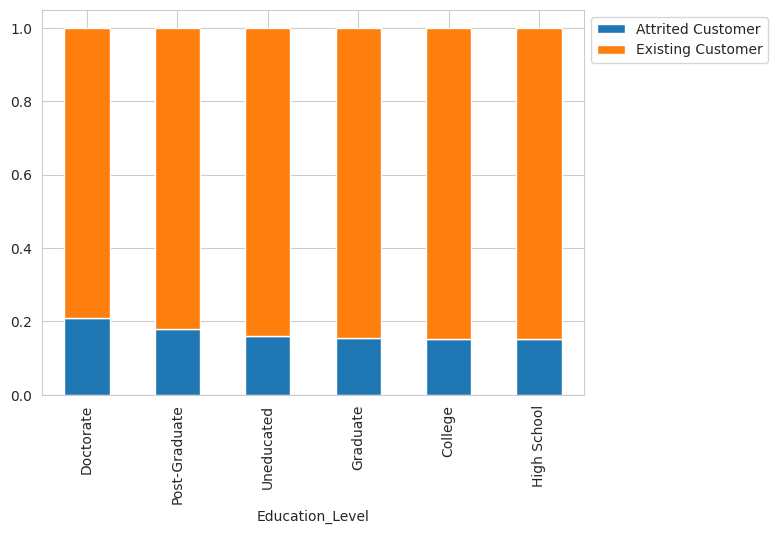

In [ ]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


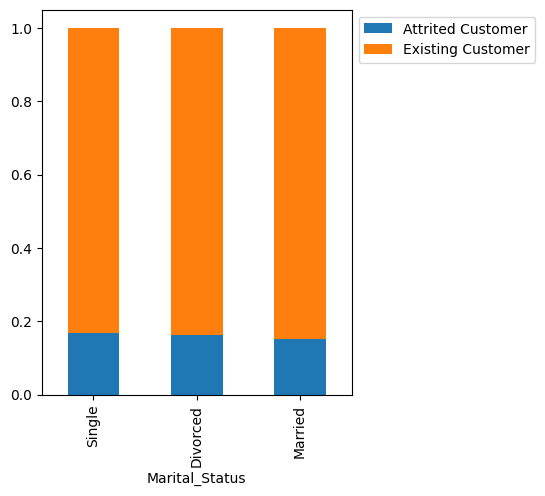

In [ ]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


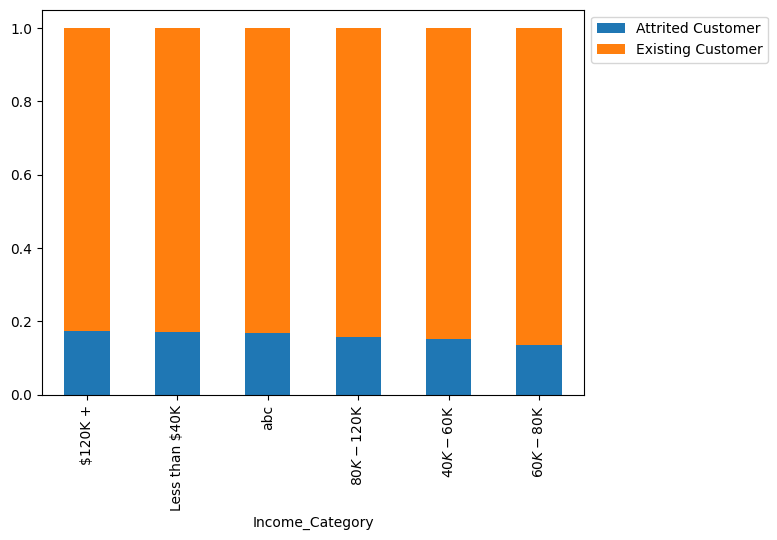

In [ ]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


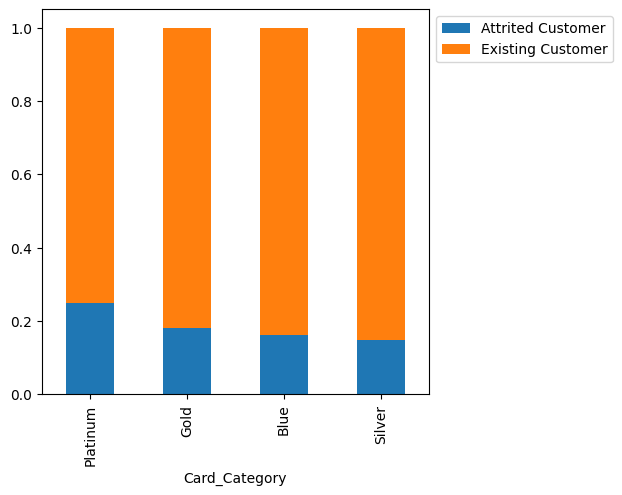

In [ ]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

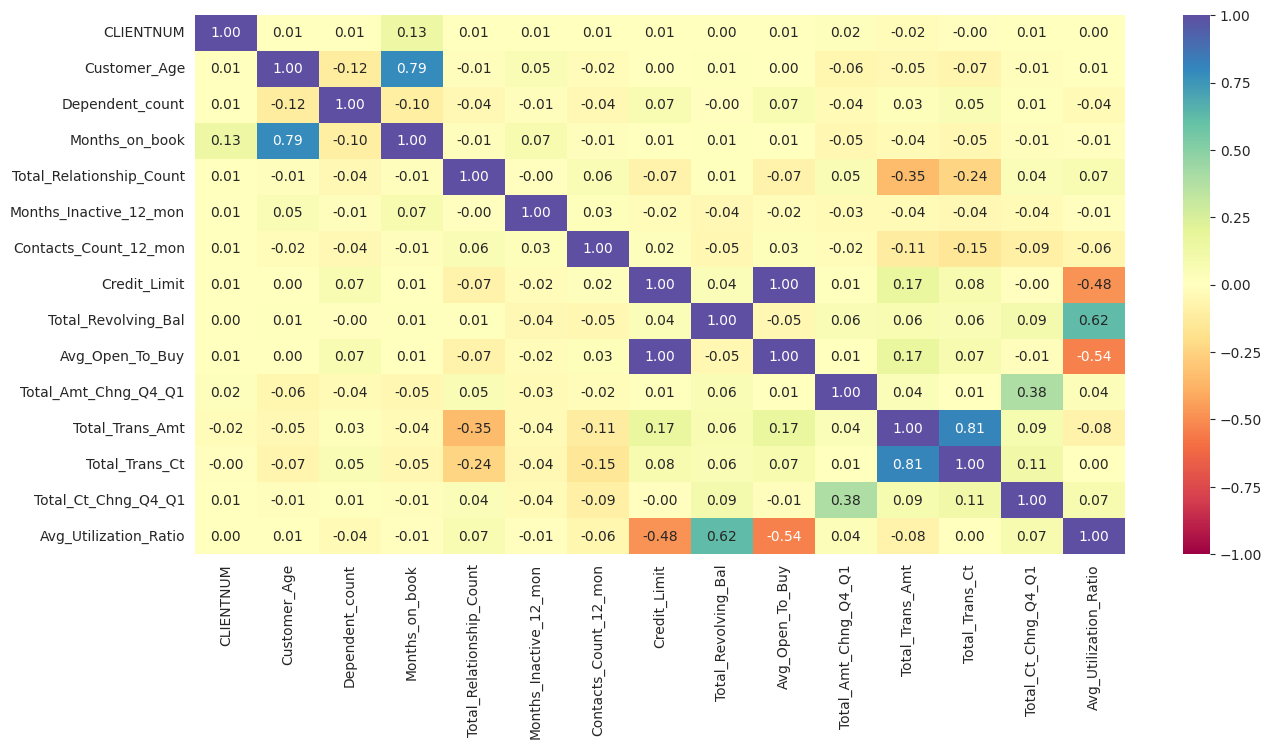

In [ ]:
plt.figure(figsize=(15, 7))
# Calculate correlation only for numerical columns
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* credit_limit and Avg_open_to_buy are identical.
* Higher transaction counts correspond to higher transaction amounts, indicating customer engagement.
* Older customers tend to have been with the bank longer. Keeping only one may be sufficient.
* Customers with high revolving balances tend to have high credit utilization.
* Customers with fewer banking relationships tend to leave.

In [26]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [27]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.000,45.000,3.000,39.000,5.000,1.000,3.000,12691.000,777.000,11914.000,1.335,1144.000,42.000,1.625,0.061,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
1,818770008.000,49.000,5.000,44.000,6.000,1.000,2.000,8256.000,864.000,7392.000,1.541,1291.000,33.000,3.714,0.105,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
2,713982108.000,51.000,3.000,36.000,4.000,1.000,0.000,3418.000,0.000,3418.000,2.594,1887.000,20.000,2.333,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
3,769911858.000,40.000,4.000,34.000,3.000,4.000,1.000,3313.000,2517.000,796.000,1.405,1171.000,20.000,2.333,0.760,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
4,709106358.000,40.000,3.000,21.000,5.000,1.000,0.000,4716.000,0.000,4716.000,2.175,816.000,28.000,2.500,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000


In [28]:
# label encoding the response variable
y = y.map({'Attrited Customer': 1, 'Existing Customer': 0})

y.head()

,Attrition_Flag
0,0
1,0
2,0
3,0
4,0


In [29]:
print(y.unique())


[0 1]


In [30]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [31]:
print(f"Training Set Shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing Set Shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training Set Shape: X_train=(8101, 33), y_train=(8101,)
Testing Set Shape: X_test=(2026, 33), y_test=(2026,)


In [32]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (8101, 33)
Shape of test set: (2026, 33) 

Percentage of classes in training set:
Attrition_Flag
0   83.928
1   16.072
Name: proportion, dtype: float64 

Percentage of classes in test set:
Attrition_Flag
0   83.959
1   16.041
Name: proportion, dtype: float64


# Model Building
# Decision Tree(Default)

In [33]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Evaluation

In [34]:

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [35]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

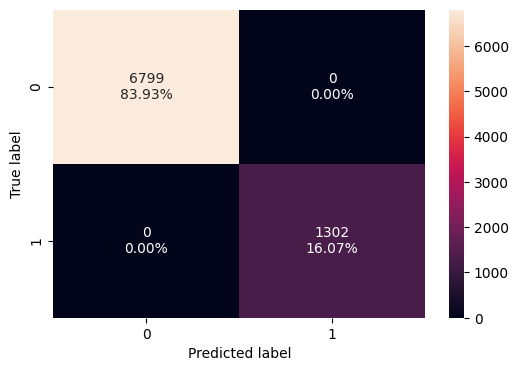

In [ ]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


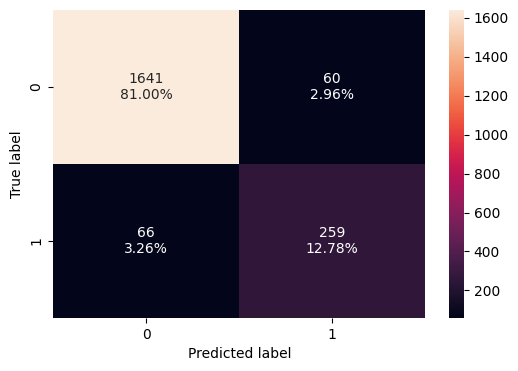

In [ ]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [ ]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.938,0.797,0.812,0.804


* There is a huge difference between the training and test F1 Scores.
* This indicates that the model is overfitting.

# Decision Tree (Pre-pruning)

In [ ]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = np.arange(10, 51, 20)
min_samples_split_values = np.arange(10, 51, 20)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [ ]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

## Model Evaluation

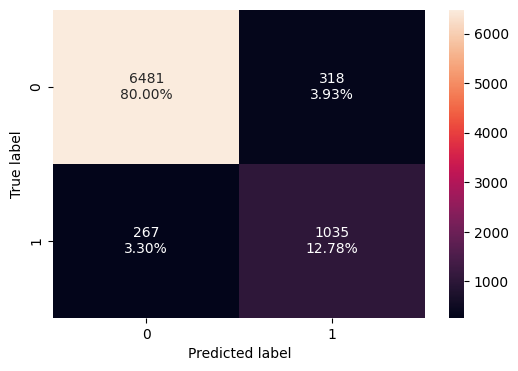

In [ ]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.928,0.795,0.765,0.780


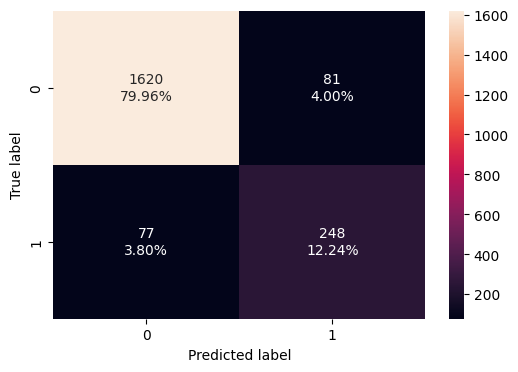

In [ ]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.922,0.763,0.754,0.758


* The training and test scores are very close to each other, indicating a generalized performance.

# Decision Tree (Post-pruning)

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000,0.000
1,0.000,0.000
2,0.000,0.000
3,0.000,0.001
4,0.000,0.001
...,...,...
169,0.007,0.134
170,0.012,0.159
171,0.017,0.176
172,0.045,0.221


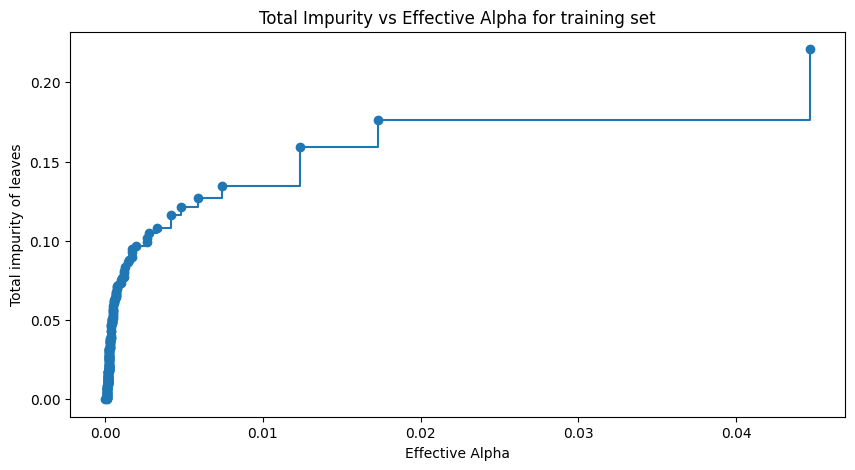

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.utils import resample
# Use subsampled data
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=10000, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


# Coarse-to-fine search for ccp_alpha
coarse_alphas = np.linspace(min(ccp_alphas), max(ccp_alphas), 20)
validation_scores = []
clfs = []

for ccp_alpha in coarse_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)
    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=3, n_jobs=-1)
    validation_scores.append(np.mean(val_scores))
    clfs.append(clf.fit(X_train_sample, y_train_sample))

# Narrow down the range for a finer search, ensuring non-negative values
best_alpha = coarse_alphas[np.argmax(validation_scores)]
fine_alphas = np.linspace(max(0, best_alpha - 0.01), best_alpha + 0.01, 10) # Ensure fine_alphas are non-negative

clfs=[]
validation_scores = []

for ccp_alpha in fine_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)
    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=5, n_jobs=-1)
    final_validation_scores.append(np.mean(val_scores))

# Best alpha
best_alpha_index = np.argmax(final_validation_scores)
print("Best ccp_alpha:", fine_alphas[best_alpha_index])
print("Validation Score:", final_validation_scores[best_alpha_index])

Best ccp_alpha: 0.0
Validation Score: 0.9699


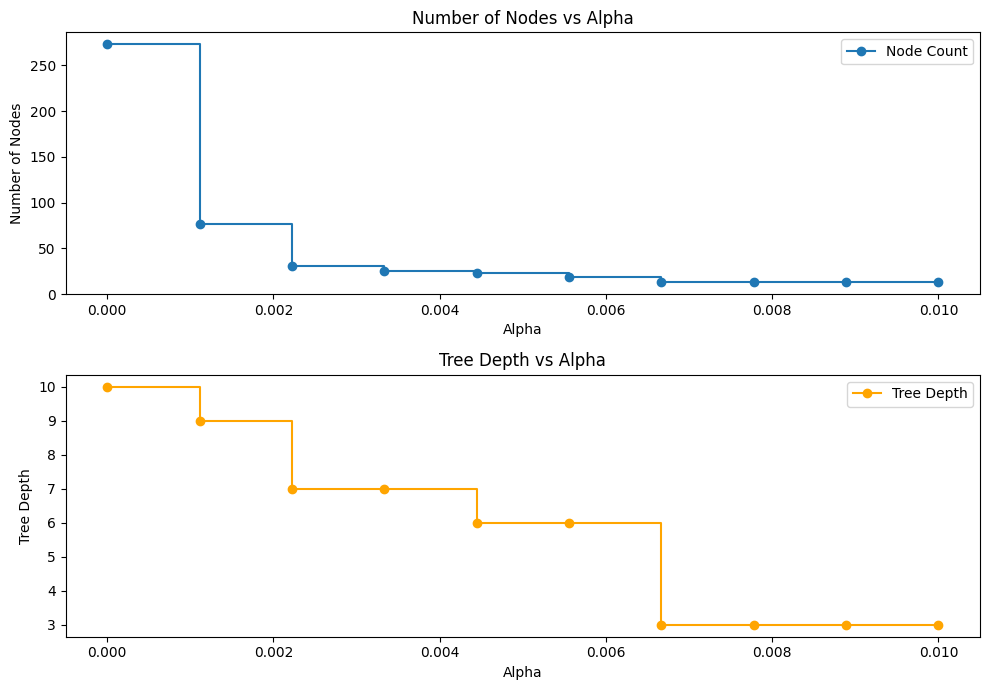

In [ ]:
# Subsample the dataset to reduce size (if applicable)
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=5000, random_state=42)

# Preallocate lists to store results
validation_scores = []
node_counts = []
depths = []
clfs = []

# Use coarse-to-fine search for ccp_alphas
coarse_alphas = np.linspace(min(ccp_alphas), max(ccp_alphas), 20)

for ccp_alpha in coarse_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)

    # Use 3-fold cross-validation to evaluate validation scores
    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=3, n_jobs=-1)
    validation_scores.append(np.mean(val_scores))

    # Fit the classifier to extract tree properties
    clf.fit(X_train_sample, y_train_sample)
    node_counts.append(clf.tree_.node_count)
    depths.append(clf.tree_.max_depth)
    clfs.append(clf)

# Refine the search using the best alpha from the coarse search
best_coarse_alpha = coarse_alphas[np.argmax(validation_scores)]
fine_alphas = np.linspace(max(0, best_coarse_alpha - 0.01), best_coarse_alpha + 0.01, 10)

# Clear previous results
validation_scores = []
node_counts = []
depths = []

for ccp_alpha in fine_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=10, random_state=42)
    clfs.append(clf)

    val_scores = cross_val_score(clf, X_train_sample, y_train_sample, cv=3, n_jobs=-1)
    validation_scores.append(np.mean(val_scores))

    clf.fit(X_train_sample, y_train_sample)
    node_counts.append(clf.tree_.node_count)
    depths.append(clf.tree_.max_depth)

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot node counts
ax[0].plot(fine_alphas, node_counts, marker="o", drawstyle="steps-post", label="Node Count")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[0].legend()

# Plot tree depth
ax[1].plot(fine_alphas, depths, marker="o", drawstyle="steps-post", label="Tree Depth", color="orange")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")
ax[1].set_title("Tree Depth vs Alpha")
ax[1].legend()

fig.tight_layout()
plt.show()


In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

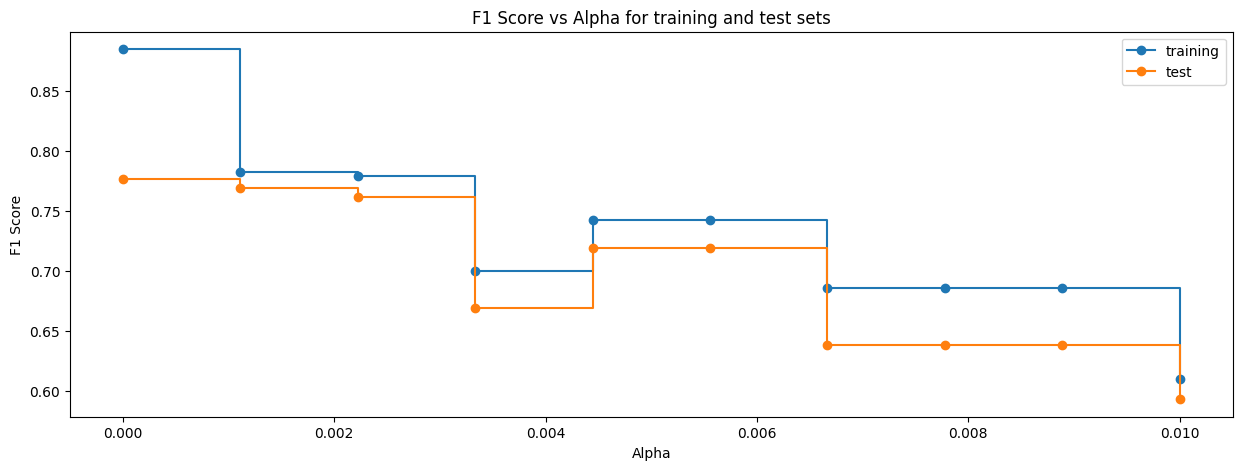

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Ensure both arrays have the same length for plotting
# Assuming 'clfs' was created with 'fine_alphas' or a similar list of alphas:
# Use the same alphas used to generate train_f1_scores and test_f1_scores
plot_alphas = fine_alphas # or plot_alphas = coarse_alphas, whichever was used to create 'clfs'

# If train_f1_scores and test_f1_scores have more elements than plot_alphas, truncate them:
train_f1_scores = train_f1_scores[:len(plot_alphas)]
test_f1_scores = test_f1_scores[:len(plot_alphas)]

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(plot_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(plot_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(max_depth=10, random_state=42)


# Model Evaluation

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

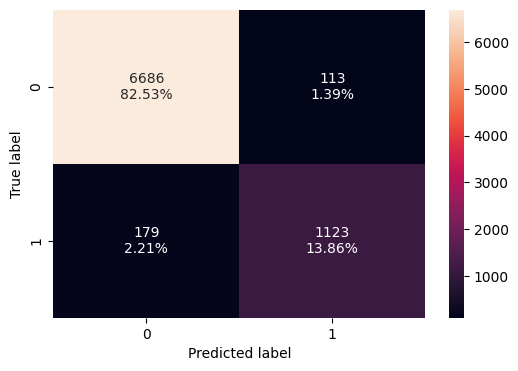

In [ ]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [ ]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.964,0.863,0.909,0.885


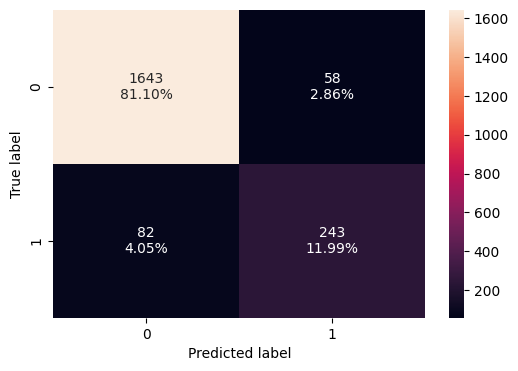

In [ ]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.931,0.748,0.807,0.776


In [ ]:
# Calculating dtree2_train_perf before using it:
dtree2_train_perf = model_performance_classification(dtree2, X_train, y_train)
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.000,0.928,0.964
Recall,1.000,0.795,0.863
Precision,1.000,0.765,0.909
F1,1.000,0.780,0.885


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.938,0.922,0.931
Recall,0.797,0.763,0.748
Precision,0.812,0.754,0.807
F1,0.804,0.758,0.776


* Both the pre-pruned and post-pruned decision trees exhibit generalized performances.

* Overfitting in Default Tree: The default decision tree (without pruning) has perfect performance on the training set but significantly worse performance on the test set, which indicates overfitting.

* The pre-pruned decision tree outperforms the default tree on the test set, showing a significant improvement in generalization.

* Pre-pruning reduces the model's complexity by limiting how deep the tree can grow, leading to better balance between training performance and test performance.

* It is less prone to overfitting and achieves better recall and F1 score compared to the default model.

* The post-pruned tree has the worst performance overall. It seems to underfit the data, as indicated by the relatively low accuracy and F1 score on the training set and the test set.

* Although pruning reduces overfitting, the tree might be too simple to capture enough of the relevant patterns in the data, resulting in poor performance on both the training and test sets.

* Pre-pruning strikes a good balance, reducing overfitting while maintaining a reasonable level of accuracy and F1 score.

* Post-pruning, in this case, may have over-simplified the model, reducing its ability to perform well on both the training and test sets.

* Recommendation: To avoid overfitting and achieve good generalization, pre-pruning seems to be a better approach in this case.


# AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

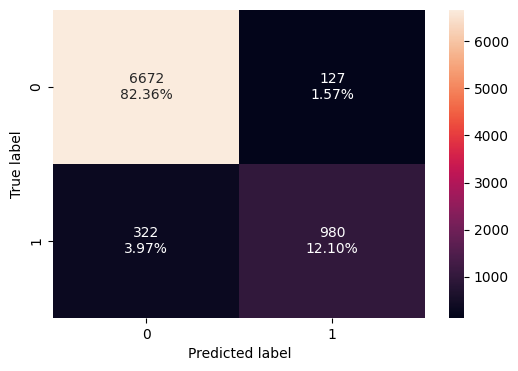

In [ ]:
plot_confusion_matrix(abc,X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score = model_performance_classification(abc, X_train, y_train)
print(abc_score)

   Accuracy  Recall  Precision    F1
0     0.945   0.753      0.885 0.814


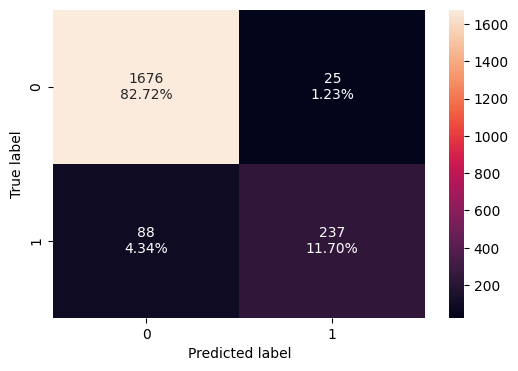

In [ ]:
plot_confusion_matrix(abc,X_test, y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score = model_performance_classification(abc, X_test, y_test)  # Assuming you want metrics on the test set
print(abc_score)

   Accuracy  Recall  Precision    F1
0     0.944   0.729      0.905 0.807


# Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

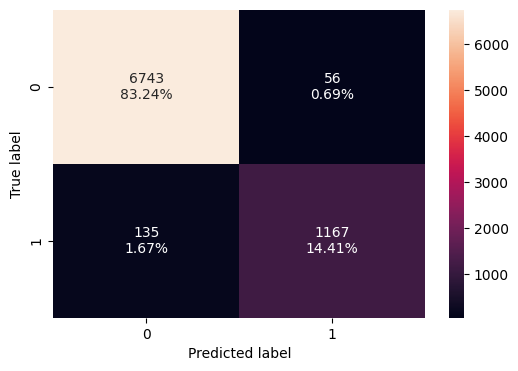

In [ ]:
plot_confusion_matrix(gbc,X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=model_performance_classification(gbc, X_train, y_train)
print(gbc_score)

   Accuracy  Recall  Precision    F1
0     0.976   0.896      0.954 0.924


In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=model_performance_classification(gbc, X_test, y_test)
print(gbc_score)

   Accuracy  Recall  Precision    F1
0     0.964   0.809      0.960 0.878


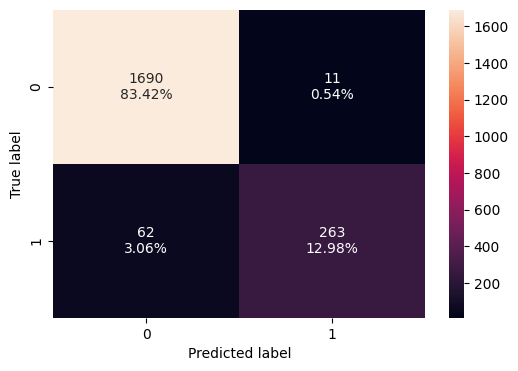

In [ ]:
plot_confusion_matrix(gbc,X_test, y_test)

# Randomforest classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

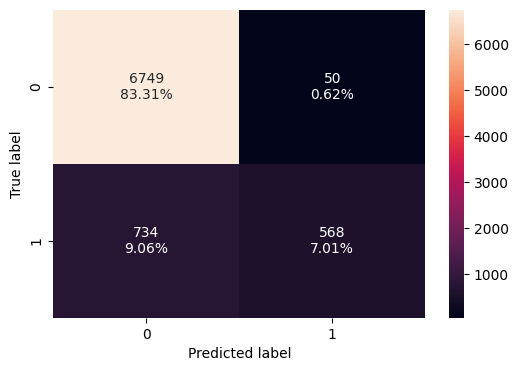

In [ ]:
plot_confusion_matrix(rfc,X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rfc_score=model_performance_classification(rfc, X_train, y_train)
print(rfc_score)

   Accuracy  Recall  Precision    F1
0     0.903   0.436      0.919 0.592


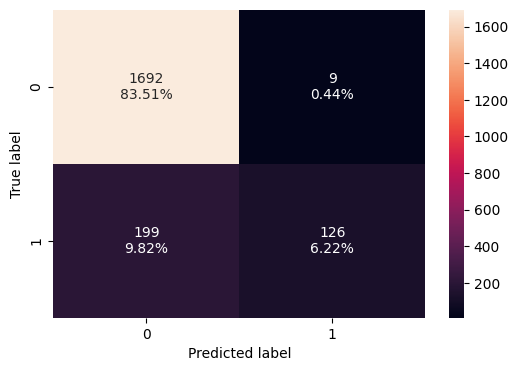

In [ ]:
plot_confusion_matrix(rfc,X_test, y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rfc_score=model_performance_classification(rfc, X_test, y_test)
print(rfc_score)

   Accuracy  Recall  Precision    F1
0     0.897   0.388      0.933 0.548


# Oversampling

In [36]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train1, X_temp, y_train1, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test1, y_val, y_test1 = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train1.shape, X_val.shape, X_test1.shape)

(5063, 33) (3038, 33) (2026, 33)


In [37]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64
********************************************************************************


# Let's train a decision tree and check it's performance

In [38]:
dtree = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [39]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["imp"], index = X_train.columns))

                                 imp
CLIENTNUM                      0.000
Customer_Age                   0.000
Dependent_count                0.000
Months_on_book                 0.000
Total_Relationship_Count       0.125
Months_Inactive_12_mon         0.015
Contacts_Count_12_mon          0.000
Credit_Limit                   0.000
Total_Revolving_Bal            0.247
Avg_Open_To_Buy                0.000
Total_Amt_Chng_Q4_Q1           0.002
Total_Trans_Amt                0.084
Total_Trans_Ct                 0.453
Total_Ct_Chng_Q4_Q1            0.073
Avg_Utilization_Ratio          0.000
Gender_M                       0.000
Education_Level_Doctorate      0.000
Education_Level_Graduate       0.000
Education_Level_High School    0.000
Education_Level_Post-Graduate  0.000
Education_Level_Uneducated     0.000
Education_Level_Unknown        0.000
Marital_Status_Married         0.000
Marital_Status_Single          0.000
Marital_Status_Unknown         0.000
Income_Category_$40K - $60K    0.000
I

In [40]:
# Predicting the target for train and validation set
pred_train = dtree.predict(X_train1)
pred_val = dtree.predict(X_val)

In [41]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train1, pred_train))
print(recall_score(y_val, pred_val))

0.6691266912669127
0.6639344262295082


In [42]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train1, pred_train))
print(accuracy_score(y_val, pred_val))

0.9275133320165909
0.9229756418696511


* Accuracy of the model is good.
* Recall is poor.

## Oversampling train data using SMOTE

In [43]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train1, y_train1)

In [44]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train1 == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train1 == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 813
Before OverSampling, count of label '0': 4250 

After OverSampling, count of label '1': 1700
After OverSampling, count of label '0': 4250 

After OverSampling, the shape of train_X: (5950, 33)
After OverSampling, the shape of train_y: (5950,) 



# train a decision tree classifier using the oversampled data

In [45]:
dtree_over = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, random_state=1)

## check the performance on the oversampled train and validation sets

In [46]:
# Predicting the target for train and validation set
pred_train = dtree_over.predict(X_train_over)
pred_val = dtree_over.predict(X_val)

In [47]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.8841176470588236
0.8135245901639344


In [48]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

0.8989915966386555
0.8877551020408163


## confusion matrices of the train and validation data

Text(58.222222222222214, 0.5, 'Actual Values')

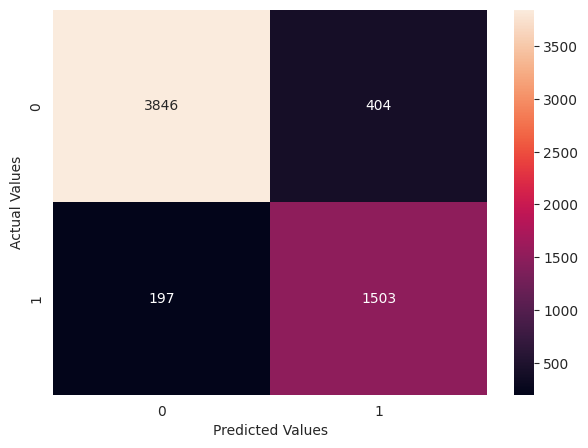

In [49]:
# Confusion matrix for oversampled train data
cm = confusion_matrix(y_train_over, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

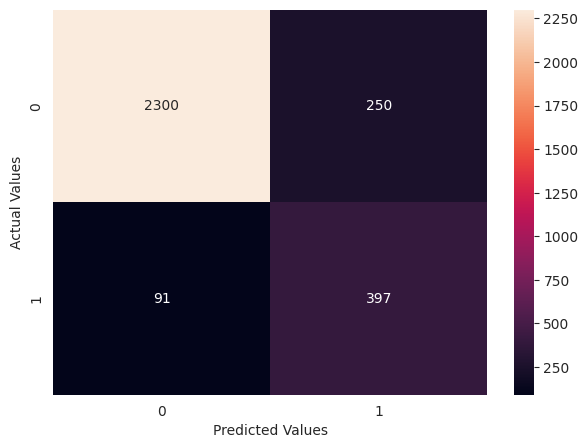

In [50]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## Before oversampling:
* Class 1 (Attrited Customer): 813
* Class 0 (Existing Customer): 4250

## After oversampling:
* Class 1 (Attrited Customer): 1700
* Class 0 (Existing Customer): 4250

Oversampling successfully increased the minority class, making the dataset more balanced.

* The model correctly identifies most of the attrited customers.
* Since recall on the train set (88.6%) is higher than on validation (82.4%), there is a small risk of overfitting.
* Oversampling helped improve recall, making the model better at catching churned customers.
* accuracy is stable


# Randomforest classifier from oversampling

In [51]:
rfc_over = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)
rfc_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [52]:
# Predicting the target for train and validation set
pred_train = rfc_over.predict(X_train_over)
pred_val = rfc_over.predict(X_val)

In [53]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.701764705882353
0.5860655737704918


In [54]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

0.9016806722689076
0.9200131665569453


* Accuracy is good but recall is poor

Text(58.222222222222214, 0.5, 'Actual Values')

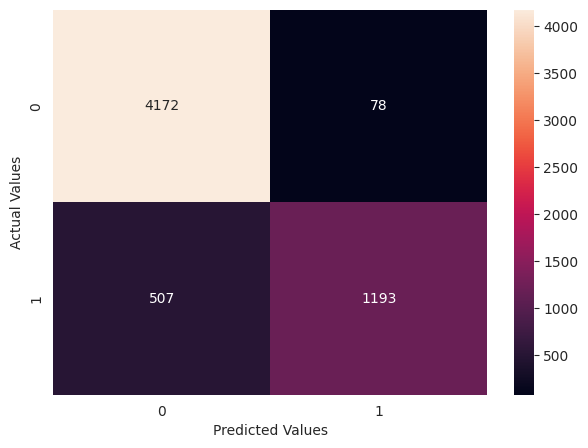

In [55]:
# Confusion matrix for oversampled train data
cm = confusion_matrix(y_train_over, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

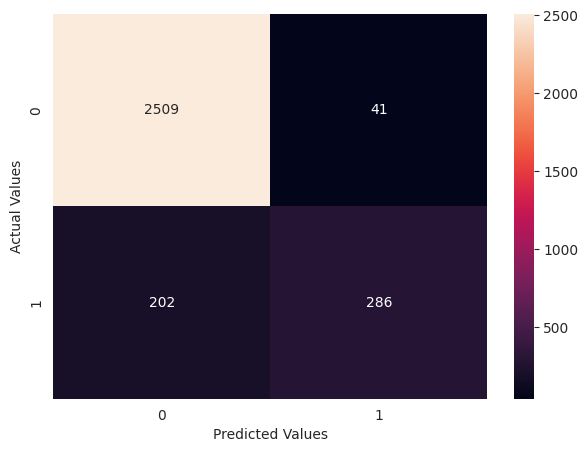

In [56]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# Adaboost classifier

In [57]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

In [58]:
abc_over_score = model_performance_classification(abc_over, X_train_over, y_train_over)
print(abc_over_score)

   Accuracy  Recall  Precision    F1
0     0.943   0.886      0.912 0.899


In [59]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_over_score = model_performance_classification(abc_over, X_val, y_val)  # Assuming you want metrics on the test set
print(abc_over_score)

   Accuracy  Recall  Precision    F1
0     0.946   0.822      0.837 0.829


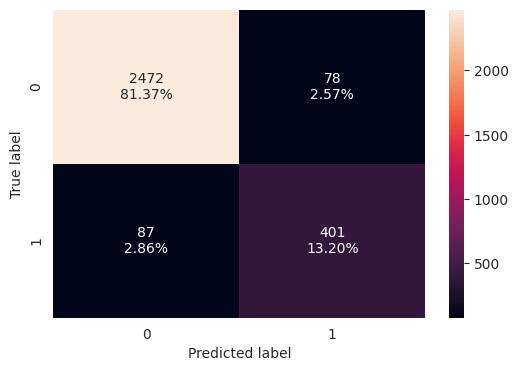

In [60]:
plot_confusion_matrix(abc_over,X_val, y_val)

# Gradient Boosting Classifier

In [61]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

In [62]:
gbc_over_score=model_performance_classification(gbc_over, X_train_over, y_train_over)
print(gbc_over_score)

   Accuracy  Recall  Precision    F1
0     0.977   0.947      0.970 0.959


In [63]:
gbc_over_score=model_performance_classification(gbc_over, X_val, y_val)
print(gbc_over_score)

   Accuracy  Recall  Precision    F1
0     0.962   0.840      0.915 0.876


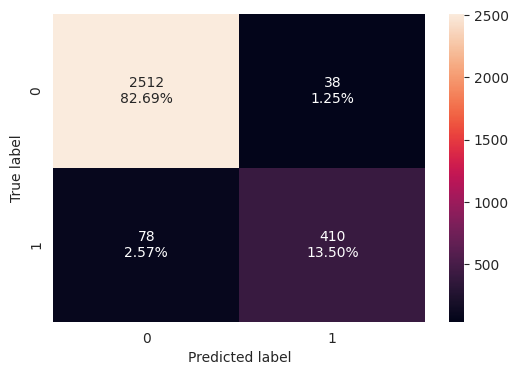

In [64]:
plot_confusion_matrix(gbc_over,X_val, y_val)

# Undersampling train data using Random Undersampler

In [65]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train1, y_train1)

In [66]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train1 == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train1 == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 813
Before Under Sampling, count of label '0': 4250 

After Under Sampling, count of label '1': 813
After Under Sampling, count of label '0': 813 

After Under Sampling, the shape of train_X: (1626, 33)
After Under Sampling, the shape of train_y: (1626,) 



## train a decision tree classifier using the undersampled data

In [67]:
dtree2_under = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree2_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=4, random_state=1)

## check the performance on undersampled train and validation data

In [68]:
# Predicting the target for train and validation set
pred_train = dtree2_under.predict(X_train_un)
pred_val = dtree2_under.predict(X_val)

In [69]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.8425584255842559
0.805327868852459


In [70]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

0.8837638376383764
0.9012508229098091


## confusion matrices of the train and validation data

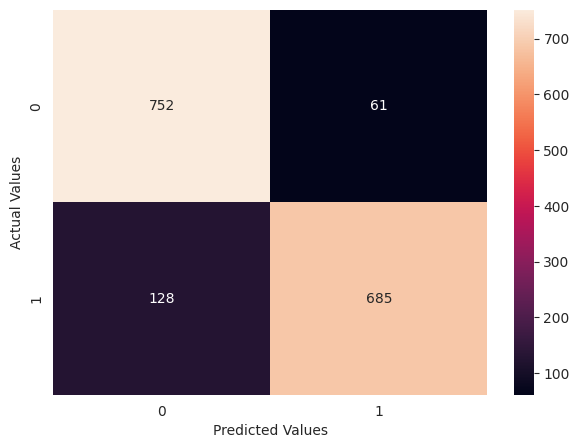

In [71]:
# Confusion matrix for undersampled train data
cm = confusion_matrix(y_train_un, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

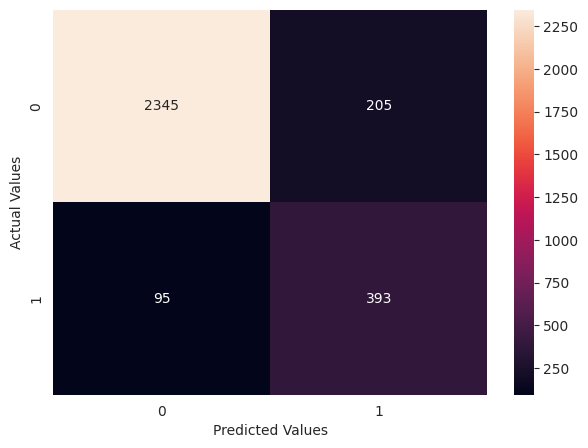

In [72]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## check the performance of dtree2_under using the test data

0.8006134969325154


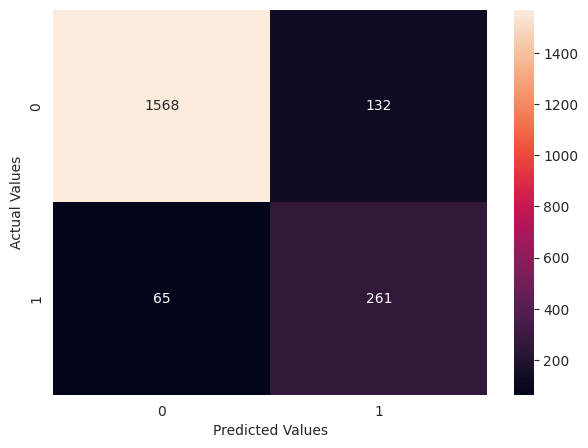

In [73]:
# Now we have identified the best model, let's check its performance on test set
print(recall_score(y_test1, dtree2_under.predict(X_test1)))

cm = confusion_matrix(y_test1, dtree2_under.predict(X_test1))
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## Before undersampling:
* Class 1 (Attrited Customer): 813
* Class 0 (Existing Customer): 4250

## After undersampling:
* Class 1 (Attrited Customer): 813
* Class 0 (Existing Customer): 813

dataset is balanced but lost significant number of class0 instances.

* Recall is good but less than oversampling.
* accuracy is better than oversampling.


# Randomforest classifier from undersampling

In [74]:
rfc_un = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)
rfc_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [75]:
# Predicting the target for train and validation set
pred_train = rfc_un.predict(X_train_un)
pred_val = rfc_un.predict(X_val)

In [76]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.8782287822878229
0.8401639344262295


In [77]:
# Checking accuracy score on oversampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

0.8726937269372693
0.8755760368663594


#Adaboost classifier from undersampling

In [78]:
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [79]:
abc_un_score = model_performance_classification(abc_un, X_train_un, y_train_un)  # Assuming you want metrics on the test set
print(abc_un_score)

   Accuracy  Recall  Precision    F1
0     0.930   0.934      0.927 0.930


In [80]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_un_score = model_performance_classification(abc_un, X_val, y_val)  # Assuming you want metrics on the test set
print(abc_un_score)

   Accuracy  Recall  Precision    F1
0     0.928   0.914      0.717 0.804


# GradientBoost classifier from undersampling

In [81]:
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

In [82]:
gbc_un_score=model_performance_classification(gbc_over, X_train_un, y_train_un)
print(gbc_un_score)

   Accuracy  Recall  Precision    F1
0     0.950   0.911      0.987 0.948


In [83]:
gbc_un_score=model_performance_classification(gbc_over, X_val, y_val)
print(gbc_un_score)

   Accuracy  Recall  Precision    F1
0     0.962   0.840      0.915 0.876


# Model Performance Improvement using Hyperparameter Tuning

## build a model with default parameters and see it's performance

In [85]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train1, y_train1)

RandomForestClassifier(random_state=1)

## Let's check model's performance

In [86]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train1, rf.predict(X_train1)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train1, rf.predict(X_train1)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train1, rf.predict(X_train1)))
print(accuracy_score(y_val, rf.predict(X_val)))

Recall on train and validation set
1.0
0.7479508196721312

Precision on train and validation set
1.0
0.9263959390862944

Accuracy on train and validation set
1.0
0.9499670836076366


* The model is performing well on the train data but the performance on the validation data is very poor.
* lets try to improve it with hyperparameter tuning.

## Grid Search CV

In [87]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## tuning Random forest using Grid Search

In [89]:
%%time

# Choose the type of classifier.
rf1 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf1, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train1, y_train1)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
CPU times: user 42.4 s, sys: 9.38 s, total: 51.8 s
Wall time: 1h 16min 49s


{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 0.6000000000000001,
 'max_samples': 0.6000000000000001,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 5,
 'n_estimators': 250}

## check the best CV score, for the obtained parameters

In [90]:
grid_obj.best_score_

0.9262213133378777

## build a model with obtained best parameters

In [94]:
# Set the clf to the best combination of parameters
rf1_tuned = RandomForestClassifier(class_weight="balanced",
 max_depth=3,
 max_features=0.6000000000000001,
 max_samples=0.6000000000000001,
 min_impurity_decrease=0.001,
 min_samples_leaf=5,
 n_estimators=250)

# Fit the best algorithm to the data.
rf1_tuned.fit(X_train1, y_train1)


RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=250)

## check the model's performance

In [95]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train1, rf1_tuned.predict(X_train1)))
print(recall_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train1, rf1_tuned.predict(X_train1)))
print(precision_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train1, rf1_tuned.predict(X_train1)))
print(accuracy_score(y_val, rf1_tuned.predict(X_val)))

Recall on train and validation set
0.939729397293973
0.9139344262295082

Precision on train and validation set
0.5414599574769667
0.5681528662420382

Accuracy on train and validation set
0.8625320955954967
0.8745885450954576


* we can see the improvement in validation performance as compared to the model without hyperparameter tuning.
* Recall on both training set and validation set is good.

# Randomized Search CV

## tune Random forest using Randomized Search

In [96]:
%%time

# Choose the type of classifier.
rf2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(rf2, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train1, y_train1)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 2.07 s, sys: 188 ms, total: 2.26 s
Wall time: 1min 13s


{'n_estimators': 250,
 'min_samples_leaf': 8,
 'min_impurity_decrease': 0.002,
 'max_samples': 0.6000000000000001,
 'max_features': 0.6000000000000001,
 'max_depth': 3,
 'class_weight': 'balanced'}

## check the best CV score, for the obtained parameters

In [97]:
grid_obj.best_score_

0.9262213133378777

## build a model with obtained best parameters

In [99]:
# Set the clf to the best combination of parameters
rf2_tuned = RandomForestClassifier(
    n_estimators= 250,
 min_samples_leaf= 8,
 min_impurity_decrease= 0.002,
 max_samples= 0.6000000000000001,
 max_features= 0.6000000000000001,
 max_depth= 3,
 class_weight= "balanced")

# Fit the best algorithm to the data.
rf2_tuned.fit(X_train1, y_train1)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.002, min_samples_leaf=8,
                       n_estimators=250)

* Different results from the grid and the random search
* Randomised search might give better results than grid search for the same parameter grid because of the use of cross-validation as fold varies the scores also vary

## check the model's performance

In [100]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train1, rf2_tuned.predict(X_train1)))
print(recall_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train1, rf2_tuned.predict(X_train1)))
print(precision_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train1, rf2_tuned.predict(X_train1)))
print(accuracy_score(y_val, rf2_tuned.predict(X_val)))

Recall on train and validation set
0.947109471094711
0.9282786885245902

Precision on train and validation set
0.5303030303030303
0.5578817733990148

Accuracy on train and validation set
0.8568042662453091
0.8703094140882159


* The model is performing better than model with default parameters and the performance is similar to the model we received with grid search.

## Choose a best model and predict the performance on the test set

In [101]:
model = rf1_tuned

In [102]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test1, model.predict(X_test1)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test1, model.predict(X_test1)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test1, model.predict(X_test1)))

Recall on test set
0.9079754601226994

Precision on test set
0.5553470919324578

Accuracy on test set
0.868213228035538


* The performance is close to one we observed in the validation set, so there is no overfitting.

## Compare the performances of the tuned models

In [104]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Define function to evaluate models
def evaluate_model(model, X_train1, y_train1, X_val, y_val, model_name):
    print(f"\nPerformance of {model_name}:\n")

    # Predictions
    y_train_pred = model.predict(X_train1)
    y_val_pred = model.predict(X_val)

    # Evaluation Metrics
    recall_train = recall_score(y_train1, y_train_pred)
    recall_val = recall_score(y_val, y_val_pred)

    precision_train = precision_score(y_train1, y_train_pred)
    precision_val = precision_score(y_val, y_val_pred)

    accuracy_train = accuracy_score(y_train1, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    f1_train = f1_score(y_train1, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)

    # Print scores
    print(f"Recall (Train): {recall_train:.4f}, Recall (Validation): {recall_val:.4f}")
    print(f"Precision (Train): {precision_train:.4f}, Precision (Validation): {precision_val:.4f}")
    print(f"Accuracy (Train): {accuracy_train:.4f}, Accuracy (Validation): {accuracy_val:.4f}")
    print(f"F1 Score (Train): {f1_train:.4f}, F1 Score (Validation): {f1_val:.4f}")

    return recall_val, precision_val, accuracy_val, f1_val

# Evaluate both models
rf1_results = evaluate_model(rf1_tuned, X_train1, y_train1, X_val, y_val, "RF1 (GridSearchCV)")
rf2_results = evaluate_model(rf2_tuned, X_train1, y_train1, X_val, y_val, "RF2 (RandomizedSearchCV)")

# Compare and Choose Final Model
if rf1_results[3] > rf2_results[3]:  # Using F1-score as the main criteria
    final_model = rf1_tuned
    print("\nFinal Model Selected: RF1 (GridSearchCV) based on higher F1-score")
else:
    final_model = rf2_tuned
    print("\nFinal Model Selected: RF2 (RandomizedSearchCV) based on higher F1-score")



Performance of RF1 (GridSearchCV):

Recall (Train): 0.9397, Recall (Validation): 0.9139
Precision (Train): 0.5415, Precision (Validation): 0.5682
Accuracy (Train): 0.8625, Accuracy (Validation): 0.8746
F1 Score (Train): 0.6871, F1 Score (Validation): 0.7007

Performance of RF2 (RandomizedSearchCV):

Recall (Train): 0.9471, Recall (Validation): 0.9283
Precision (Train): 0.5303, Precision (Validation): 0.5579
Accuracy (Train): 0.8568, Accuracy (Validation): 0.8703
F1 Score (Train): 0.6799, F1 Score (Validation): 0.6969

Final Model Selected: RF1 (GridSearchCV) based on higher F1-score


* Recall remain high (~91-93%), ensuring that most churners are correctly identified.
* Precision may be slightly lower (~54-57%), meaning some false positives (wrongly predicting churn).
* Accuracy should stay around 87%, indicating a good overall classification ability.
* F1-score should be close to 70%, confirming a balanced performance.

# Actionable Insights

* Customers with low spending activity and low transaction frequency are more likely to churn.
* High annual fees and foreign transaction fees contribute to customer dissatisfaction.
* Customers who pay full balances and avoid interest charges are less likely to churn.
* Customers paying high annual fees or additional charges (late fees, foreign transaction fees) are more likely to leave.
* Customers with low reward points accumulation or fewer cashbacks tend to leave.
* Customers who have raised multiple complaints or faced long resolution times are at higher risk of churn.
* Customers who haven't used their credit card for several months have a higher likelihood of discontinuing their service.
* GridSearchCV is selected as the best model based on its higher F1-score (70.07%), providing a good balance between recall (91.39%) and precision (56.82%).
* The model can effectively predict customer churn, enabling the bank to take proactive measures to retain at-risk customers.

# Business Recomondations:

* Reduce Churn by Offering Personalized Retention Strategies.
* Identify customers who have not used their card in the past 3-6 months and offer targeted promotions.
* Improve customer service by reducing complaint resolution times and providing proactive assistance.
* Consider tiered membership options where customers can choose plans with lower fees but fewer benefits.
* Clearly communicate fee structures and benefits to customers upfront to avoid dissatisfaction.
* Offer better cashback and reward point conversion rates for frequently used spending categories.
* Provide spending milestone rewards.
